# Decision Tree and Random Forest Project
For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.



Here are what the columns represent:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Importing Libraries
**importing the usual libraries for pandas and plotting alongwith some of the sklearn libraries**

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the .csv file

In [62]:
loans=pd.read_csv('loan_data.csv')

In [63]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [64]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

In [65]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

(array([  3.,   1.,   8.,   5., 214., 131., 541., 438., 395., 963., 548.,
        974., 472., 839., 424., 388., 691., 313., 560., 258., 451., 142.,
        158., 258.,  85., 173.,  55.,  78.,   6.,   6.]),
 array([612.        , 619.16666667, 626.33333333, 633.5       ,
        640.66666667, 647.83333333, 655.        , 662.16666667,
        669.33333333, 676.5       , 683.66666667, 690.83333333,
        698.        , 705.16666667, 712.33333333, 719.5       ,
        726.66666667, 733.83333333, 741.        , 748.16666667,
        755.33333333, 762.5       , 769.66666667, 776.83333333,
        784.        , 791.16666667, 798.33333333, 805.5       ,
        812.66666667, 819.83333333, 827.        ]),
 <a list of 30 Patch objects>)

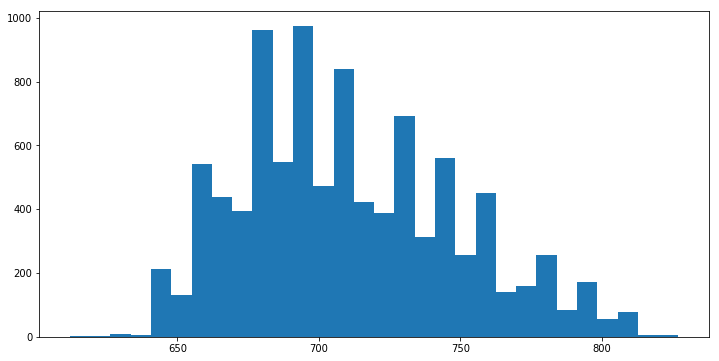

In [66]:
plt.figure(figsize=(12,6))
plt.hist(loans['fico'],bins=30)

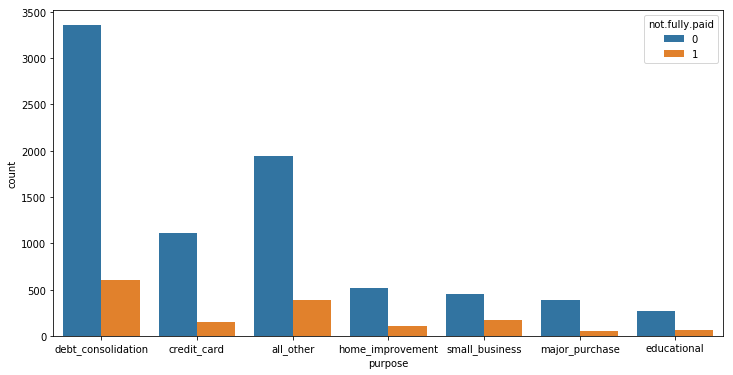

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(loans['purpose'],hue=loans['not.fully.paid'])

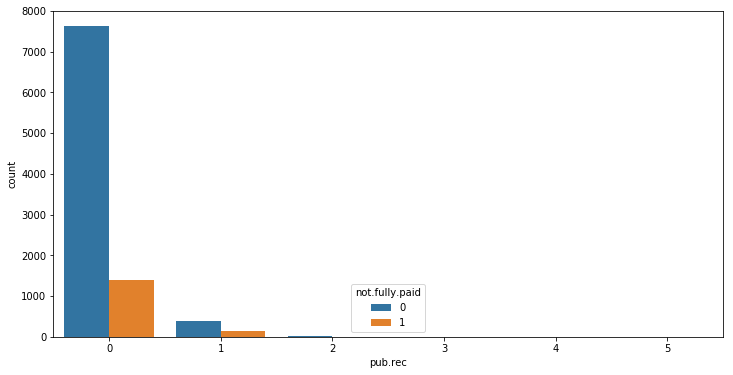

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(loans['pub.rec'],hue=loans['not.fully.paid'])

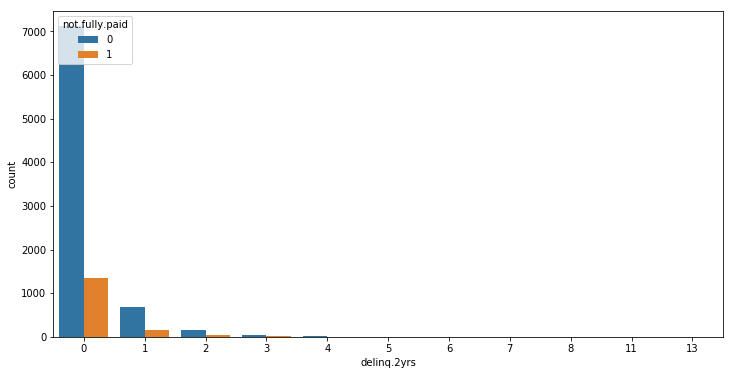

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(loans['delinq.2yrs'],hue=loans['not.fully.paid'])

Text(0.5,0,'intrest rate')

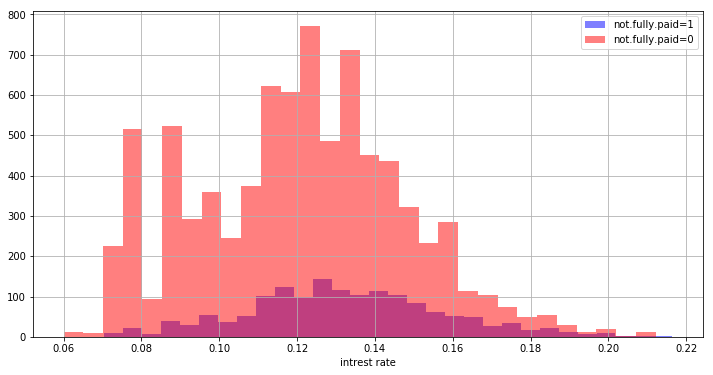

In [70]:
plt.figure(figsize=(12,6))
loans[loans['not.fully.paid']==1]['int.rate'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['int.rate'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('intrest rate')

In [71]:
loans['int.rate'].mean()

0.12264006055543834

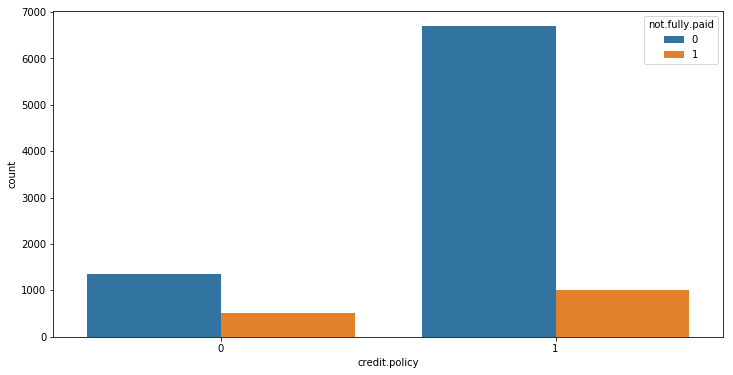

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(loans['credit.policy'],hue=loans['not.fully.paid'])

# Categorical features

Now we have to convert the given categorical data into some numeric value so that machine will be able to understand it.
We will do it by providing dummies by using pandas

In [73]:
final_loans=pd.get_dummies(loans['purpose'],drop_first=True)

In [74]:
final_loans.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [75]:
loans=pd.concat([loans,final_loans],axis=1)

In [76]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [77]:
loans=loans.drop(['purpose'],axis=1)

In [78]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Train Test Split

We will split the data into training and testing datasets by using train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(loans.drop(['not.fully.paid'],axis=1), loans['not.fully.paid'], test_size=0.33, random_state=101)

# Training a Decision Tree

In [80]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**predictions from the test set and create a classification report and a confusion matrix.**

In [81]:
predictions = dt.predict(X_test)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2666
          1       0.18      0.22      0.20       495

avg / total       0.74      0.72      0.73      3161



In [84]:
print(confusion_matrix(y_test,predictions))

[[2157  509]
 [ 384  111]]


# Checking the Score

In [85]:
dt.score(X_test,y_test)

0.7174944637772857

In [86]:
dt.score(X_train,y_train)

1.0

**The decision tree is giving us a score of around 71%. Although it's not that bad but the reason behind this is mainly over-fitting.Now we will use Random forest to improve the model**

In [87]:
rfc = RandomForestClassifier(n_estimators=600)

In [88]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
rfc.score(X_test,y_test)

0.8430876304966782

**The score increased to 84% by using Random forest classifier**

## Thank you!